## Telco Customer Churn Data 


This data set is from Kaggle's library. The data highlets a teleco company's customer data, including which services they currently purchase, their monthly charge and total, or 'lifetime' costs. The last category, 'churn' describes whether or not the customer has cancelled service in the last month. 

In this notebook, we'll take a high level view of the data, start to ask questions based on EDA, and see if we can gather any early insights. 


## Storytelling
From this dataset, we weren't sure if there are early indicators for churn, but we had a few guesses, such as whether monthly charges affected churn, or tenure of the customer. By comparing the tenure of a customer and the churn data, we found that customers with longer tenure are less likely to churn. We then looked at monthly charges, and as we guessed, those customers with higher monthly charges (specifically more than 60 dollars per month) are more likely to churn than others. 

Trying to understand if there were other factors to churn outside of monthly cost, we looked at whether paperless billing (thinking that easier to manage) would produce less churn, but the opposite was true. The customers that did have paperless billing were more likely to churn. 

Lastly, we found that the majority of churn came from month-to-month customers. The best bet moving forward would be lock in customers to annual or multi-year contracts to prevent churn. This is for a few reasons, contracts produce less churn, but the data also shows that the longer the tenure, the less likely of churn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #to plot visuals
import seaborn as sns #to plot visuals

In [2]:
#importing csv data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#dropping categories that do not make sense to evaluate
#customerID is unique for every row, parnter and dependent will affect how many services are signed up, but that is captured in 
# other column data already
# paymentmethod is captured more simplisticaly in the PaperlessBilling column

drop_cat = ['customerID','Partner', 'Dependents', 'MultipleLines', 'PaymentMethod']
df.drop(drop_cat, axis = 1, inplace =True)

In [7]:
df.head()

,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,Male,0,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,0,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [8]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [9]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

This might be a safe bet, but would customer tenure have a relationship with churn? My guess is that if the customer has longer tenure, then they did not churn. 

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

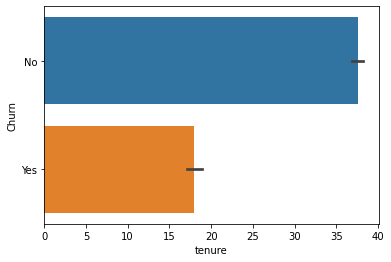

In [10]:
sns.barplot(x = 'tenure', y = 'Churn', data = df)

A quick visual supports this, that most customers with tenure over 20yrs did not churn, while customers under 20yrs did churn. 


what about churn and monthly charges? Can we assume that those with higher monthly charges are more likely to churn? 

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

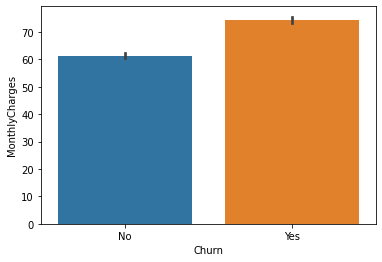

In [11]:
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df)

Yes, it looks like customers that did churn have a mean monthly charge of over 70 dollars while those that did not churn have a mean monthly charge around 60 dollars. 


In [14]:
df['ChurnNumeric'] = pd.Series(np.where(df.Churn.values == 'Yes', 1, 0),
          df.index)

In [15]:
df.head()

,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ChurnNumeric
0,Female,0,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No,0
1,Male,0,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No,0
2,Male,0,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes,1
3,Male,0,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No,0
4,Female,0,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,1


What about paperless billing, can we take a guess that customers who do not have paperless billing are generaly older, and thus 
likely more tenured, and less likely to churn? 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='tenure'>

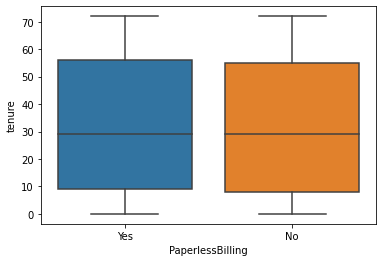

In [18]:
sns.boxplot(x = 'PaperlessBilling', y = 'tenure', data = df)

Tenure doesn't seem to have much of a difference between those who selected paperless or non paperless billing

<AxesSubplot:xlabel='PaperlessBilling', ylabel='ChurnNumeric'>

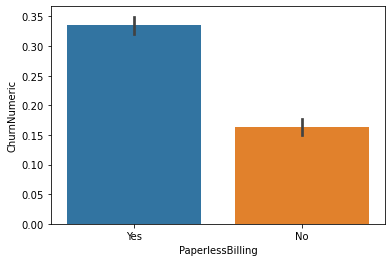

In [16]:
sns.barplot(x = 'PaperlessBilling', y = 'ChurnNumeric', data = df)

Interesting, it looks like the customers who did have paperless billing are more likely to churn. This is partially align with our thought process, that those with paperless billing are more likely to churn, but our initial thought of tenure equates to nonpaperless billing was inaccurate. 

<AxesSubplot:xlabel='Contract', ylabel='ChurnNumeric'>

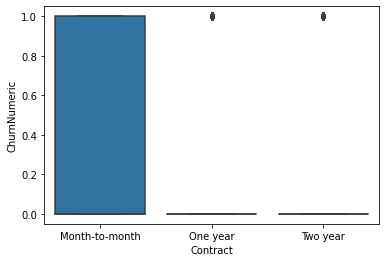

In [23]:
sns.boxplot(x = 'Contract', y = 'ChurnNumeric', data = df)

From this, it looks like month to month contracts are most likely to churn, while those in longer contracts did not. 